1.PLOT THE RANDOM Data
2.Create a 2 * 2 matrix sampled from a uniform distribution with values between 0 and 1
3.Multiply the matrices 1 and 3
4.plot the product
5.Calculate the variance along dominant direction and the direction perpendicular to it
6.Covaraince matrix
7.Eigen values
8.Proportion of variances
9.Y=PX
10.SY Calculate the covaraince matix of y

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
X = np.random.randn(20,2)

In [109]:
X.shape

(20, 2)

In [110]:
X.mean()

0.0506099651039114

In [111]:
X.std()

0.8953307990721389

In [112]:
import matplotlib.patches as mpatches

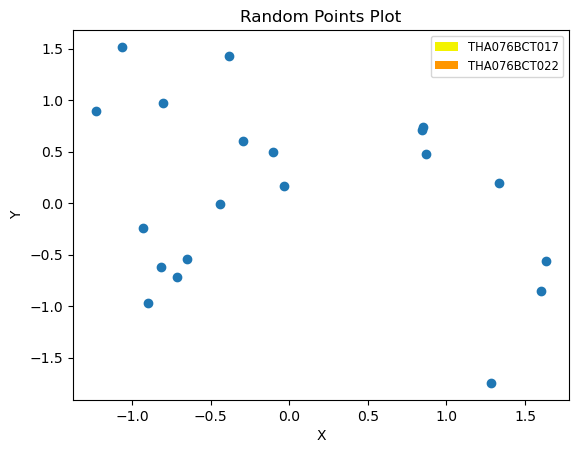

In [113]:
plt.scatter(X[:,0], X[:,1], linewidths=1)
plt.title("Random Points Plot")
one = mpatches.Patch(facecolor='#f3f300', label='THA076BCT017', linewidth = 0)
two = mpatches.Patch(facecolor='#ff9700', label = 'THA076BCT022', linewidth = 0)
plt.xlabel("X")
plt.ylabel("Y")
legend = plt.legend(handles=[one, two],fontsize = 'small')

In [114]:
x1 = np.random.rand(2,2)

In [115]:
x1

array([[0.87469266, 0.99988756],
       [0.72534164, 0.4647501 ]])

In [116]:
Y = np.matmul(X, x1)

In [117]:
Y

array([[ 0.17228367, -0.35572761],
       [ 0.09509445,  0.04755313],
       [ 1.30644702,  1.42394103],
       [ 0.77933162,  1.20271677],
       [-0.38566011, -0.43910261],
       [ 1.10621625,  1.09057904],
       [-1.48720583, -1.34795002],
       [ 0.00429295, -0.34956553],
       [ 1.02626777,  1.37668365],
       [-0.95959178, -0.89965828],
       [-1.14561423, -1.04713418],
       [-0.98447538, -1.03853167],
       [-0.14255945,  0.47310721],
       [ 0.70024279,  0.28004251],
       [ 0.27078195,  0.12717653],
       [ 0.17891352, -0.01386016],
       [-0.42626642, -0.81423587],
       [-1.16252426, -1.10192173],
       [ 1.28363497,  1.19691287],
       [ 1.25064801,  1.17237042]])

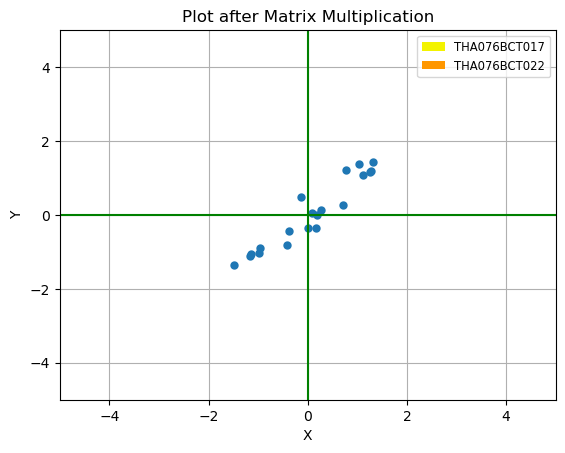

In [118]:
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.title("Plot after Matrix Multiplication")
plt.axhline(y=0, color="g")
plt.axvline(x=0, color="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(Y[:,0], Y[:,1], linewidths=0.01)
one = mpatches.Patch(facecolor='#f3f300', label='THA076BCT017', linewidth = 0)
two = mpatches.Patch(facecolor='#ff9700', label = 'THA076BCT022', linewidth = 0)
legend = plt.legend(handles=[one, two],fontsize = 'small')

In [119]:
# Varaiance of the matrix
np.var(Y[:,0])

0.7722121229699487

In [120]:
# Variance of the matrix
np.var(Y[:,1])

0.8379245187262268

In [121]:
# Covariance of the matrix
cov_matrix = np.cov(Y.T)

In [122]:
cov_matrix

array([[0.81285487, 0.80718445],
       [0.80718445, 0.88202581]])

In [123]:
# Variance of the corrlated data
np.matmul(Y.T, Y) / (Y.shape[0] -1)

array([[0.81862108, 0.81101519],
       [0.81101519, 0.88457072]])

In [124]:
# Varinance of random data
np.matmul(X.T, X) / (X.shape[0] -1)

array([[ 0.93914226, -0.2336892 ],
       [-0.2336892 ,  0.75386534]])

In [125]:
from numpy.linalg import eig

In [126]:
eigen_values, eigen_vectors = eig(cov_matrix)

In [127]:
eigen_values

array([0.03951528, 1.65536539])

In [128]:
eigen_vectors

array([[-0.72208302, -0.69180641],
       [ 0.69180641, -0.72208302]])

In [129]:
# proportion of variance
total = np.sum(eigen_values)

In [130]:
# gives the proportion of variance explained by a particular eigen value/ pricipal component in the dataset 
def explained_variance(eigenvalues):
    sum = eigenvalues.sum()
    return (eigenvalues/sum) * 100

In [131]:
value = explained_variance(eigen_values)

In [132]:
value

array([ 2.33144923, 97.66855077])

In [133]:
transformed = np.matmul(eigen_vectors.T, Y.T).T

In [134]:
Y.shape

(20, 2)

In [135]:
transformed.shape

(20, 2)

In [136]:
np.cov(transformed.T)

array([[ 3.95152824e-02, -1.44387571e-16],
       [-1.44387571e-16,  1.65536539e+00]])

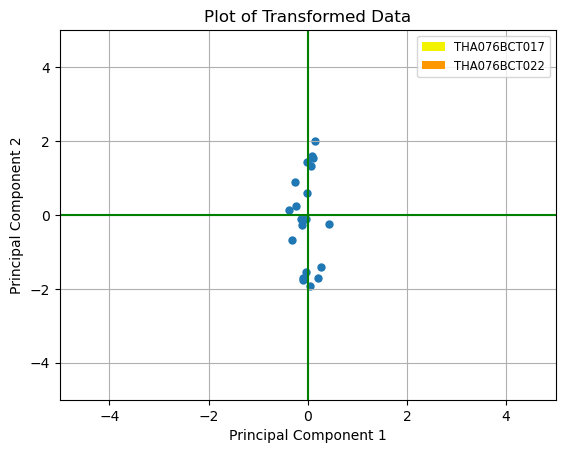

In [137]:
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.title("Plot of Transformed Data")
plt.axhline(y=0, color="g")
plt.axvline(x=0, color="g")
plt.scatter(transformed[:,0], transformed[:,1], linewidths=0.01)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
one = mpatches.Patch(facecolor='#f3f300', label='THA076BCT017', linewidth = 0)
two = mpatches.Patch(facecolor='#ff9700', label = 'THA076BCT022', linewidth = 0)
legend = plt.legend(handles=[one, two],fontsize = 'small')

In [138]:

eigen_vectors.T[0]

array([-0.72208302,  0.69180641])

In [139]:
oned_transformed = np.matmul(eigen_vectors.T[0].T, Y.T).T

In [140]:
oned_transformed.shape
zeros = np.zeros(oned_transformed.shape[0],)

In [141]:
zeros.shape

(20,)

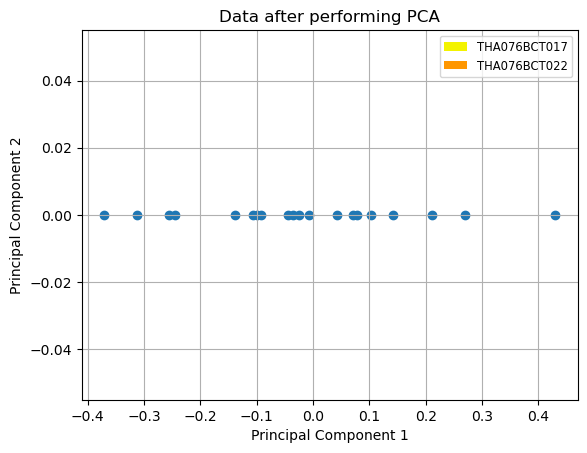

In [142]:
plt.grid()
plt.title("Data after performing PCA")
plt.scatter(oned_transformed, zeros)
plt.legend(["17, 22"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
one = mpatches.Patch(facecolor='#f3f300', label='THA076BCT017', linewidth = 0)
two = mpatches.Patch(facecolor='#ff9700', label = 'THA076BCT022', linewidth = 0)
legend = plt.legend(handles=[one, two],fontsize = 'small')

In [146]:
oned_transformed.shape

(20,)

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=20)

pca.fit(Y)

new_Y = pca.transform(Y)

In [147]:
new_Y.shape

(20, 1)

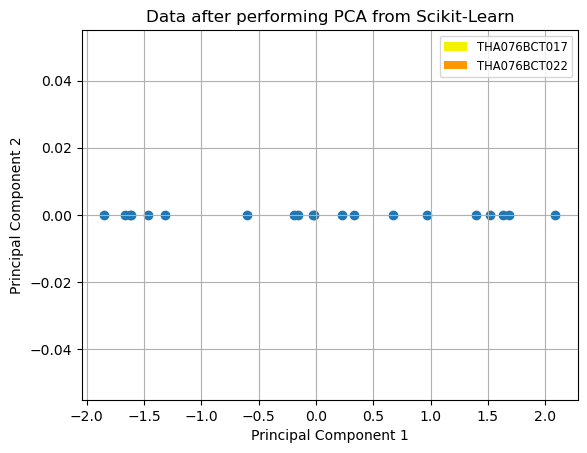

In [151]:
plt.grid()
plt.title("Data after performing PCA from Scikit-Learn")
plt.scatter(new_Y, zeros)
plt.legend(["17, 22"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
one = mpatches.Patch(facecolor='#f3f300', label='THA076BCT017', linewidth = 0)
two = mpatches.Patch(facecolor='#ff9700', label = 'THA076BCT022', linewidth = 0)
legend = plt.legend(handles=[one, two],fontsize = 'small')